In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings ('ignore')


In [8]:
df = pd.read_csv(r"C:\Users\Santosh Shinde\Downloads\BIKE DETAILS.csv") 
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [8]:
## 1) What is the range of selling prices in the dataset ?
df['selling_price']

0       175000
1        45000
2       150000
3        65000
4        20000
         ...  
1056     17000
1057     16000
1058     15000
1059     12000
1060     10000
Name: selling_price, Length: 1061, dtype: int64

In [9]:
## 2)What is the median selling price for bikes in the dataset?

df['selling_price'].median()

45000.0

In [36]:
## 3) What is the most common seller type?
df.groupby("seller_type")["seller_type"].count().sort_values(ascending  = False).head(1).to_frame()


,seller_type
seller_type,
Individual,1055


In [81]:
## 4) How many bikes have driven more than 50,000 kilometers?
df[df['km_driven']>50000].count().head(1)


name    170
dtype: int64

In [90]:
##5) What is the average km_driven value for each ownership type?
df.groupby('owner')["km_driven"].mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [136]:
## 6) What proportion of bikes are from the year 2015 or older?
df['year'].count()/(df['year']<=2015).value_counts(normalize = True) 

year
True     1873.079867
False    2447.219565
Name: proportion, dtype: float64

In [142]:
##7) What is the trend of missing values across the datasetD
df.isnull().count()

name                 1061
selling_price        1061
year                 1061
seller_type          1061
owner                1061
km_driven            1061
ex_showroom_price    1061
dtype: int64

In [167]:
## 8) What is the highest ex_showroom_price recorded, and for which bike
df[["name","ex_showroom_price"]].max()

name                  Yo Style
ex_showroom_price    1278000.0
dtype: object

In [14]:
## 9) What is the total number of bikes listed by each seller type ?

df.groupby('seller_type')['name'].count()


seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64

<Axes: xlabel='first_owner', ylabel='selling_price'>

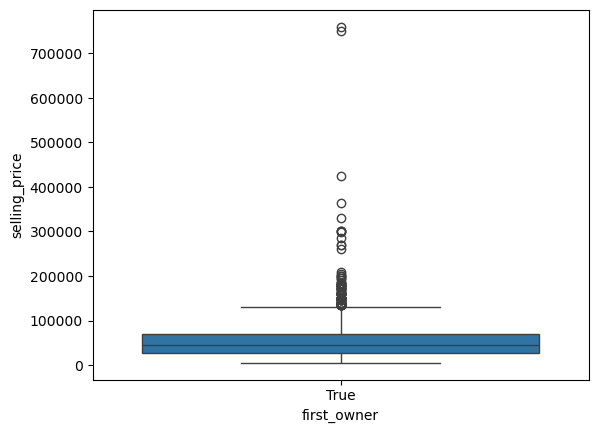

In [42]:
##10 What is the relationship between selling_price and km_driven for first-owner bikes?


df["first_owner"] = df['owner'] == "1st owner"
sns.boxplot(x='first_owner', y='selling_price', data=df)

In [5]:
### 11) Identify and remove outliers in the km_driven column using the IQR method ?


plt.boxplot(x ='first_owner' y = 'salary', data = df )


SyntaxError: invalid syntax. Perhaps you forgot a comma? (76204723.py, line 4)

In [ ]:
## five point summery 

In [20]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


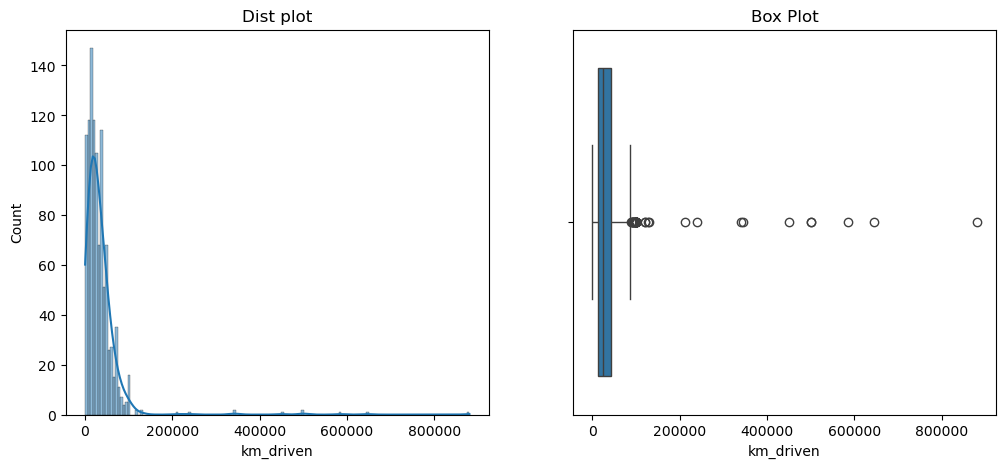

In [23]:
### to check outliers >> distplot, boxplot

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['km_driven'],kde = True)
plt.title ("Dist plot")
plt.subplot(1,2,2)
sns.boxplot(data = df, x = 'km_driven')
plt.title("Box Plot")
plt.show()

In [ ]:
## dropping the outlier
## capping the outlier 
## replace with mean and median



In [27]:
## dropping the outlier

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

IQR = Q3-Q1
lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR



In [28]:
df_filtered =df[(df.km_driven>=lower_fence) & (df.km_driven <= upper_fence)]

In [30]:
df.shape

(1061, 7)

In [31]:
df_filtered.shape

(1022, 7)

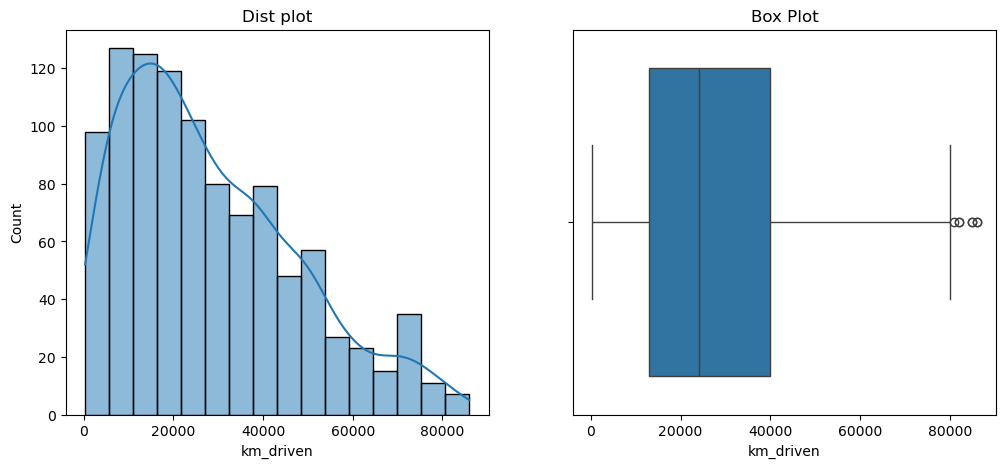

In [33]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df_filtered['km_driven'],kde = True)
plt.title ("Dist plot")
plt.subplot(1,2,2)
sns.boxplot(data = df_filtered, x = 'km_driven')
plt.title("Box Plot")
plt.show()

In [17]:
cr = pd.read_csv(r"C:\Users\Santosh Shinde\Downloads\Car Sale.csv")
cr

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [46]:
### 1) What is the average selling price of cars for each dealer, and how does it compare across different dealers ?

cr.groupby('Dealer_Name')["Price ($)"].mean().sort_values(ascending = False)

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

In [47]:
### 2) Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
cr.groupby('Dealer_Name')["Price ($)"].max() - cr.groupby('Dealer_Name')["Price ($)"].min()



Dealer_Name
Buddy Storbeck's Diesel Service Inc                76000
C & M Motors Inc                                   76001
Capitol KIA                                        76001
Chrysler Plymouth                                  76400
Chrysler of Tri-Cities                             76000
Classic Chevy                                      76000
Clay Johnson Auto Sales                            76000
Diehl Motor CO Inc                                 76250
Enterprise Rent A Car                              76001
Gartner Buick Hyundai Saab                         83801
Hatfield Volkswagen                                76600
Iceberg Rentals                                    76301
McKinney Dodge Chrysler Jeep                       80801
Motor Vehicle Branch Office                        76001
Nebo Chevrolet                                     76300
New Castle Ford Lincoln Mercury                    76000
Pars Auto Sales                                    76200
Pitre Buick-Pontiac

In [48]:
## 3) What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

cr.groupby('Transmission').sum('Price ($)')


,Annual Income,Price ($),Phone
Transmission,,,
Auto,10501199756,355112220,94308499118
Manual,9360868100,316413245,84932487889


In [49]:
##4)What is the distribution of car prices across different regions?
cr.groupby('Dealer_Region').sum('Price ($)')


,Annual Income,Price ($),Phone
Dealer_Region,,,
Aurora,2646447664,88687382,23501159158
Austin,3402482981,117192531,31014775375
Greenville,2604583980,88149602,23504383062
Janesville,3186394063,106351234,28592014947
Middletown,2582453815,87134628,23476663213
Pasco,2673796634,88040714,23470045625
Scottsdale,2765908719,95969374,25681945627


In [28]:
## 5) What is the distribution of cars based on body styles?
cr.groupby('Body Style')['Company'].count()


Body Style
Hardtop      2971
Hatchback    6128
Passenger    3945
SUV          6374
Sedan        4488
Name: Company, dtype: int64

In [50]:
## 6) How does the average selling price of cars vary by customer gender and annual income ?

cr.groupby('Gender')[['Annual Income','Price ($)']].mean()


,Annual Income,Price ($)
Gender,,
Female,755973.021339,28277.265270
Male,851184.044207,28039.429407


In [51]:
## 7) What is the distribution of car prices by region, and how does the number of cars sold vary by region ?
cr.groupby(['Dealer_Region'])['Price ($)'].agg([( 'company','count'),('price','mean')])

,company,price
Dealer_Region,,
Aurora,3130,28334.626837
Austin,4135,28341.603628
Greenville,3128,28180.819054
Janesville,3821,27833.350955
Middletown,3128,27856.338875
Pasco,3131,28119.039923
Scottsdale,3433,27954.958928


In [86]:
## 8) How does the average car price differ between cars with different engine sizes ?
cr.groupby('Engine')['Price ($)'].mean()


Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64

In [114]:
## 9)  How do car prices vary based on the customer’s annual income bracket ?
cr.groupby('Annual Income')['Price ($)'].mean().to_frame()

,Price ($)
Annual Income,
10080,22801.000000
13500,27878.981415
24000,61001.000000
85000,43000.000000
106000,46001.000000
...,...
6600000,39000.000000
6800000,15000.000000
7650000,21000.000000


In [93]:
## 10)  What are the top 5 car models with the highest number of sales, and how does their price distribution look ?
cr[['Company','Price ($)']].value_counts().sort_values(ascending  = False).head(5).to_frame()

,,count
Company,Price ($),
Chrysler,26000,135
Dodge,31000,133
Pontiac,19000,130
Dodge,19000,130
Ford,22000,126


In [102]:
## 11) How does car price vary with engine size across different car colors, and which colors have the highest price variation?

cr.groupby(['Engine','Color'])['Price ($)'].max().sort_values(ascending  = False).head(1).to_frame()

,,Price ($)
Engine,Color,
Overhead Camshaft,Black,85800


In [109]:
### 12)  Is there any seasonal trend in car sales based on the date of sale ? 
cr.groupby('Date')['Company'].value_counts().sort_values(ascending = False).to_frame()

count
Date       Company          
9/5/2023   Dodge          17
11/24/2023 Chevrolet      17
11/8/2022  Chevrolet      17
11/10/2023 Volkswagen     15
9/4/2023   Chevrolet      15
...                      ...
3/31/2022  Toyota          1
           Pontiac         1
           Nissan          1
           Mitsubishi      1
9/9/2023   Volvo           1

[10489 rows x 1 columns]

In [111]:
## 13) How does the car price distribution change when considering different combinations of body style and transmission type?
cr.groupby(['Body Style','Transmission'])['Price ($)'].mean().to_frame()


Price ($)
Body Style Transmission              
Hardtop    Auto          31520.188210
           Manual        27016.943698
Hatchback  Auto          25910.544824
           Manual        28702.550562
Passenger  Auto          28915.835149
           Manual        28969.521039
SUV        Auto          27501.404407
           Manual        26079.019161
Sedan      Auto          29955.294344
           Manual        29664.271572

In [56]:
## 14) What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

cr.groupby('Engine')[['Annual Income','Price ($)']].agg('mean','Price ($)')

,Annual Income,Price ($)
Engine,,
DoubleÂ Overhead Camshaft,835351.185745,28248.525972
Overhead Camshaft,825837.503308,27914.710631


In [52]:
## 15)  How does the average car price vary across different car models and engine types
cr.groupby(['Model','Engine'])['Price ($)'].mean().to_frame()

Price ($)
Model    Engine                                 
3-Sep    DoubleÂ Overhead Camshaft  37986.380117
3000GT   DoubleÂ Overhead Camshaft  22764.326923
         Overhead Camshaft          21770.659864
300M     DoubleÂ Overhead Camshaft  21394.888889
323i     DoubleÂ Overhead Camshaft  16744.632287
...                                          ...
Windstar Overhead Camshaft          17100.272727
Wrangler DoubleÂ Overhead Camshaft  21145.294737
         Overhead Camshaft          18742.942029
Xterra   DoubleÂ Overhead Camshaft  15940.459459
         Overhead Camshaft          31072.500000

[261 rows x 1 columns]

In [96]:
cr

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [61]:
### EDA 3
am = pd.read_csv(r"C:\Users\Santosh Shinde\Downloads\amazon.csv")
am.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [62]:
am['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [63]:
am['rating'] = am['rating'].astype(str).str.replace("|", "")
am['rating_count'] = pd.to_numeric(am['rating_count'], errors='coerce')

In [64]:
am['rating'] = pd.to_numeric(am['rating'], errors='coerce')

In [65]:
##1) What is the average rating for each product category?
am.groupby('category')['rating'].mean().sort_values(ascending = False).to_frame()


,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5
OfficeProducts|OfficeElectronics|Calculators|Basic,4.5
...,...
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.6
"Electronics|HomeTheater,TV&Video|Accessories|3DGlasses",3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.5


In [66]:
## 2)  What are the top rating_count products by category? 

am.groupby(['product_name','category'])['rating'].max().sort_values(ascending = False).head(1).to_frame()

,,rating
product_name,category,
"Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop","Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",5.0


In [67]:
am['rating'].unique()

array([4.2, 4. , 3.9, 4.1, 4.3, 4.4, 4.5, 3.7, 3.3, 3.6, 3.4, 3.8, 3.5,
       4.6, 3.2, 5. , 4.7, 3. , 2.8, 3.1, 4.8, 2.3, nan, 2. , 2.6, 2.9])

In [68]:
##3) What is the distribution of discounted prices vs. actual prices? 

am[["discounted_price","actual_price"]]

,discounted_price,actual_price
0,₹399,"₹1,099"
1,₹199,₹349
2,₹199,"₹1,899"
3,₹329,₹699
4,₹154,₹399
...,...,...
1460,₹379,₹919
1461,"₹2,280","₹3,045"
1462,"₹2,219","₹3,080"
1463,"₹1,399","₹1,890"


In [69]:
am[	'discount_percentage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1465 entries, 0 to 1464
Series name: discount_percentage
Non-Null Count  Dtype 
--------------  ----- 
1465 non-null   object
dtypes: object(1)
memory usage: 11.6+ KB


In [71]:
##4) How does the average discount percentage vary across categories?
am.groupby('category')[['discount_percentage']].sum()/am['discount_percentage'].count()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [72]:
###5)  What are the most popular product names?
am.groupby('product_name')['category'].count().sort_values(ascending = False).to_frame().head(1)


,category
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5


In [73]:
am['product_name'].value_counts().sort_values(ascending = False).to_frame().head(1)

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5


In [74]:
##6) What are the most popular product keywords?

am[['product_id','product_name']].count().sort_values(ascending = False).head(1)


product_id    1465
dtype: int64

In [75]:
##7)  What are the most popular product reviewsk
am[['review_content','product_name']].value_counts().sort_values(ascending = False).to_frame().head(1)

,,count
review_content,product_name,
"I liked it, worth the money, light weight and comfortable at every situation.this one i got here has stable ui,no lag even,feels premium (mainly the soft strap and the cool crown button adds up much)..the main reason I bought this because it brings all the features everyone needs today with out of the box looks.If someone feels that they have a thin wrist and it wouldn't fit them,don't worry.Even i thought it wouldn't fit me coz i have a thin wrist but it was just fine.,,In this watch, the screen does not turn on and off on double tap, for that you have to press the button and the battery also takes more than 1 hour instead of 35 minutes to get fully charged. And the battery also lasts only 3-4 days, just hope that in the future, if I update the software, then the double tap option will come.,Watch is user friendly, UI is great.Calling feature is great.This watch is different from others in music playing in watch speaker.Great experience.Watchfaces option is good.We can add watchfaces as we can.In my other watch this feature is missing.Love this watch.,This Smartwatch is perfect for beginners who's buy first time smartwatch. ninja call pro plus is recently launched so it comes with latest features and specifications. Display Is top Notched and and brightness is enough for use at outdoor. Heart measure and Spo2 is well accurate all sensors are efficiently worked. Reading of data is accurate near 90 to 95% you can trust on it at emergency situations. It comes with 100 sports mods all types of activities and sports are coverd. Calling experience is also very nice, speaker and microphone is quite decent sufficient voice at indoor. But battery should be better it has require charge 1 time in day. 3D curved display give awasome visual experience. Strap quality is very soft and female also use it very smoothly. So overall it has best smartwatch under 2K Display, Calling, Sensors, Bulit quality, Battery Back-up, sports Mods, Waterproof, etc. You should definitely go for this one. Satisfied Product.👍🔥👍,This watch is very good but 1 problem im using this watch from 1 week and a few days back its pixels were droping, the screen was not working properly but after restarting, it was working properly and from then i didn,t face that problem again.,Nice watch with good UI interface with calling feature. Power packed with features in very low price. If you are on tight budget and looking for caling smartwatch you should definitely go for this one.,The build quality is great.The review about this watches are as follows:Good call quality and Google assistant supportThe UI experience is very smooth except the split screen feature it's a little bit laggyThe only thing that is only bad about this product is the step accuracy I feel like its a little bit lagging back but it catches up to it after a half an hourYou can buy this product if you are on a tight budget and want calling and good UI experience you can buy this product","Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5


In [76]:
am.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,NaN,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,NaN,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,NaN,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,NaN,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,NaN,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


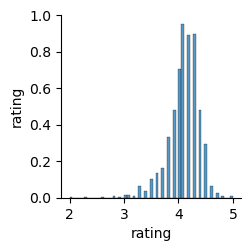

In [86]:
##8)Visualize relationships between multiple numerical variables simultaneously using a pair plot?
numerical_features = [feature for feature in am.columns if am[feature].dtype != 'O']

numerical_features
sns.pairplot(am[['rating']])



In [15]:
##9)  What are the Top 5 categories based on the highest ratings ?
am.groupby('category')['rating_count'].mean().sort_values(ascending = False).to_frame().head(5)

,rating_count
category,
"Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|StorageWaterHeaters",959.0
Computers&Accessories|Accessories&Peripherals|LaptopAccessories|NotebookComputerStands,903.0
"Home&Kitchen|Heating,Cooling&AirQuality|Fans|CeilingFans",898.0
"Electronics|HomeTheater,TV&Video|AVReceivers&Amplifiers",897.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|SATACables,817.0


In [19]:
##10) Identify any potential areas for improvement or optimization based on the data analysis



array([ nan, 815., 184., 974., 355., 576., 462., 493., 314., 656., 450.,
       457., 149., 210., 602., 398., 536.,  32., 902., 127., 425., 766.,
       505., 590., 132.,  37., 592., 284.,  81., 285., 919., 387., 211.,
        12.,  24., 254.,  57., 577., 343.,   5., 612., 313., 350., 490.,
       491.,  61., 789., 407., 839.,  64., 339.,  27., 197., 928., 110.,
       356., 246., 479., 910., 567., 466., 474., 431., 242., 295., 323.,
       185., 103., 224.,  85., 897., 282., 513.,  23.,  51., 708., 523.,
       121., 112.,  73.,  47., 214.,   7.,  41.,  25., 163.,  87., 106.,
       129., 390., 621., 265., 838., 143., 151., 200., 227., 538., 171.,
       136., 301., 154., 240., 758., 828., 596., 104., 119., 125.,  38.,
       412., 681., 305., 714., 465., 245., 276.,  14., 768., 690., 206.,
       644., 401., 989., 903., 241., 255., 388., 575., 352.,  93., 676.,
       362.,  21., 434., 817., 357., 485., 594.,  74., 427., 670., 419.,
        75., 691., 408., 418., 257., 900., 976.,   